In [1]:
import pandas as pd

In [8]:
# file = "/hpc/group/vossenlab/rck32/eic/work_eic/macros/Timing_estimation/data/df/old_400events_high_thresh.csv"
file = "/hpc/group/vossenlab/rck32/eic/work_eic/macros/Timing_estimation/data/df/old_200events.csv"
file_old = "/hpc/group/vossenlab/rck32/eic/work_eic/macros/Timing_estimation/data/df/old_50events.csv"

In [9]:
df = pd.read_csv(file)
df_old = pd.read_csv(file_old)

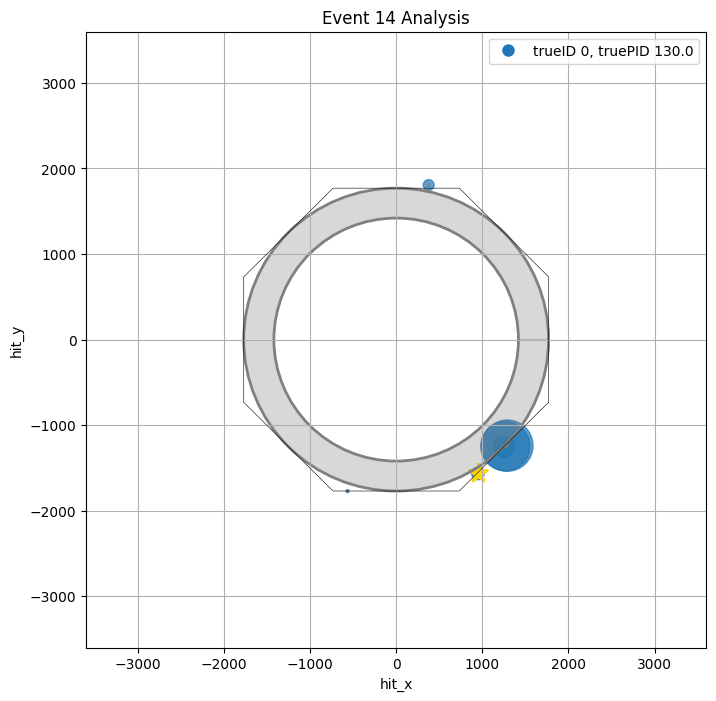

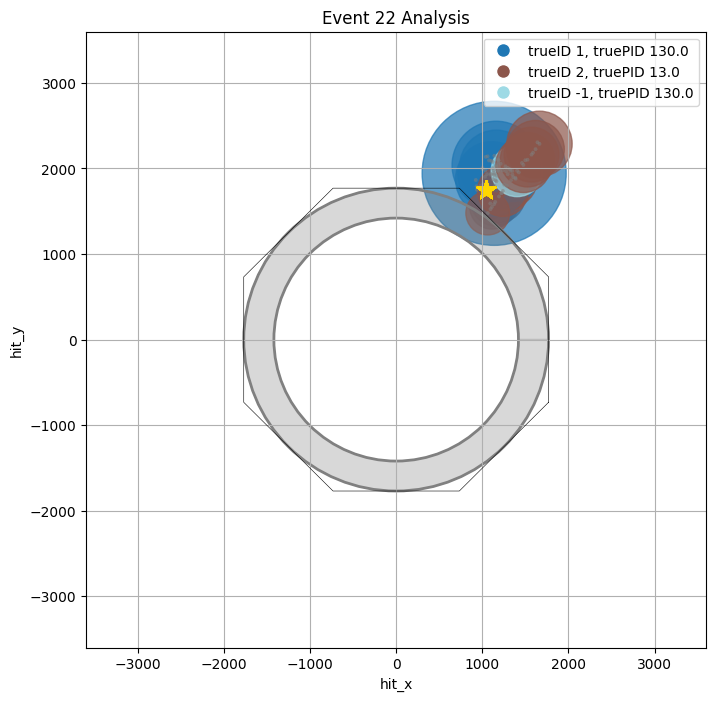

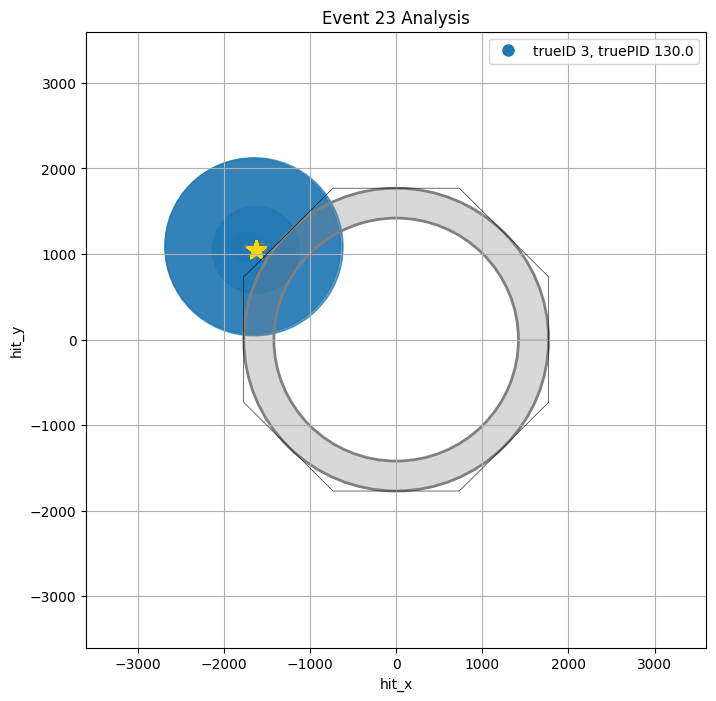

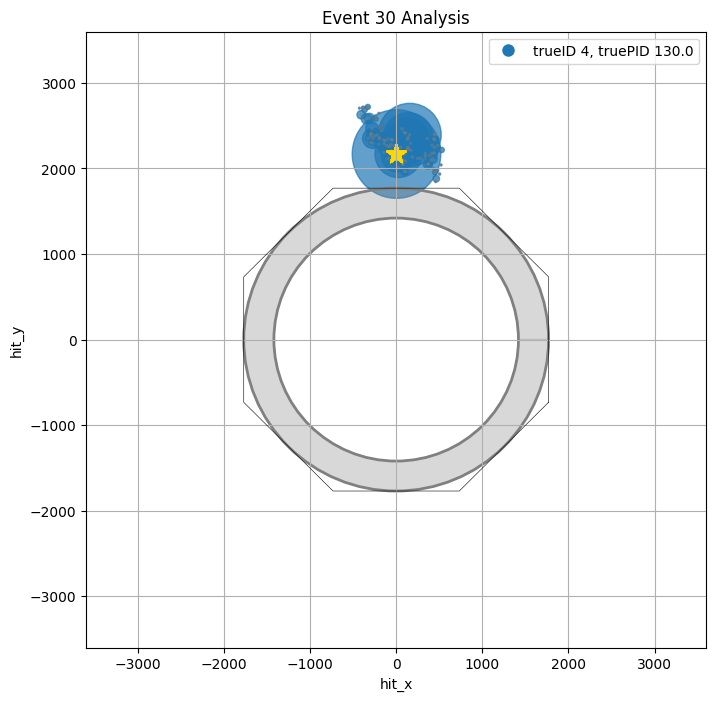

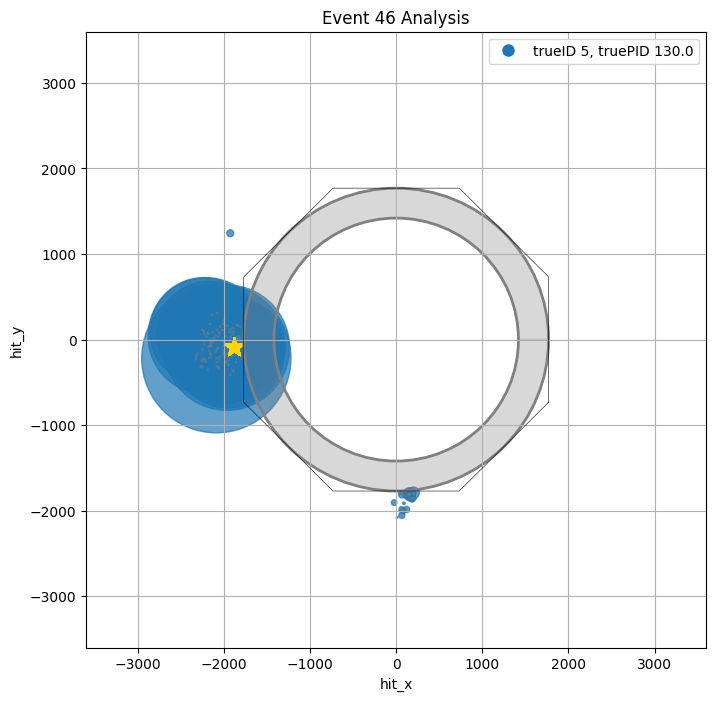

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

import numpy as np
import matplotlib.cm as cm
data = df_old
# Group the data by event_idx for analysis
events = data.groupby("event_idx")

# Create a colormap for trueID values

# Loop through each event and create plots
for event_idx, group in events:
    
    unique_trueIDs = []
    labels = []
    for trueID,truePID in zip(group["trueID"],group["truePID"]):
        if(trueID in unique_trueIDs):
#             trueID_index += 1
            continue
        else:
#             length = group["truePID"].keys()
#             print(f"len {length}, idx: {trueID_index}")
#             truePID = group["truePID"][trueID_index]
            unique_trueIDs.append(trueID)
            labels.append(f"trueID {trueID}, truePID {truePID}")
#             trueID_index += 1
    unique_trueIDs = np.array(unique_trueIDs)
    colors = cm.tab20(np.linspace(0, 1, len(unique_trueIDs)))
    color_map = dict(zip(unique_trueIDs, colors))
    # Prepare data for plotting
    x = group["hit_x"]
    y = group["hit_y"]
    sizes = group["Charge1"] + group["Charge2"]
    trueIDs = group["trueID"]
    phi = np.arctan2(y, x)

    # Assign colors based on trueID
    point_colors = [color_map[tid] for tid in trueIDs]

    # Create the plot
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, s=sizes * 20, c=point_colors, alpha=0.7, label="Data points")
    plt.quiver(x, y, np.cos(phi), np.sin(phi), angles="xy", scale_units="xy", scale=1, color="gray", alpha=0.5)
    endpoints_x = np.array(group["KMU_endpoint_x"])
    endpoints_y = np.array(group["KMU_endpoint_y"])
    plt.scatter(endpoints_x, endpoints_y, color="gold", marker="*", s=200, label="KMU Endpoint")

    # Add legend for trueID colors
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[tid], markersize=10) 
               for tid in unique_trueIDs]
#     labels = [f"trueID {tid[0]}, truePID {tid[1]}" for tid in unique_trueIDs]
    plt.legend(handles, labels, loc="upper right")

    # Add labels and title
    plt.xlabel("hit_x")
    plt.ylabel("hit_y")
    plt.title(f"Event {event_idx} Analysis")
    plt.grid(True)
    
    R = (1420 + 350)
    R_min = (1420)
    color = "black"
    outer_radius = R / np.cos(np.pi/8)
    angles = np.linspace(-np.pi/8, 2*np.pi-np.pi/8, 9)[:-1] 
    hex_x = outer_radius * np.cos(angles)
    hex_y = outer_radius * np.sin(angles)
    plt.plot(np.append(hex_x,hex_x[0]), np.append(hex_y, hex_y[0]), color=color, linewidth=0.4)
    
    #circle drawing
    theta = np.linspace(0, 2*np.pi, 100)

    # Create points for the outer and inner circles
    x_outer = R * np.cos(theta)
    y_outer = R * np.sin(theta)
    x_inner = R_min * np.cos(theta)
    y_inner = R_min * np.sin(theta)

    # Combine the points to create a closed path
    x = np.concatenate([x_outer, x_inner[::-1], [x_outer[0]]])
    y = np.concatenate([y_outer, y_inner[::-1], [y_outer[0]]])

    # Fill the region between circles
    plt.fill(x, y, alpha=0.3, color='gray', label='Solenoid')

    circle_out = Circle((0, 0), R, color="gray", fill=False, linewidth=2)
    circle_in = Circle((0, 0), R_min, color="gray", fill=False, linewidth=2)
    plt.gca().add_patch(circle_out)
    plt.gca().add_patch(circle_in)

    plt.xlim(-3600,3600)
    plt.ylim(-3600,3600)
    plt.show()
#     if(event_idx > 200):
#         break


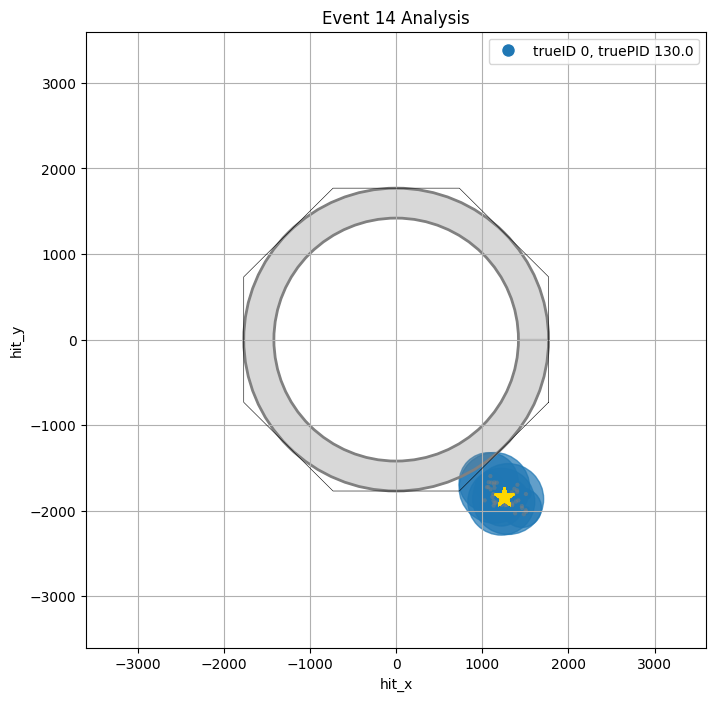

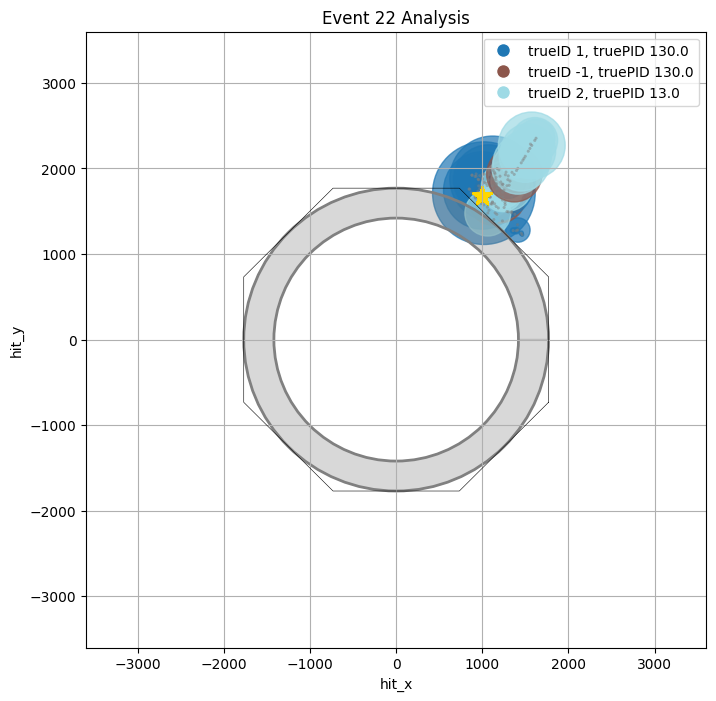

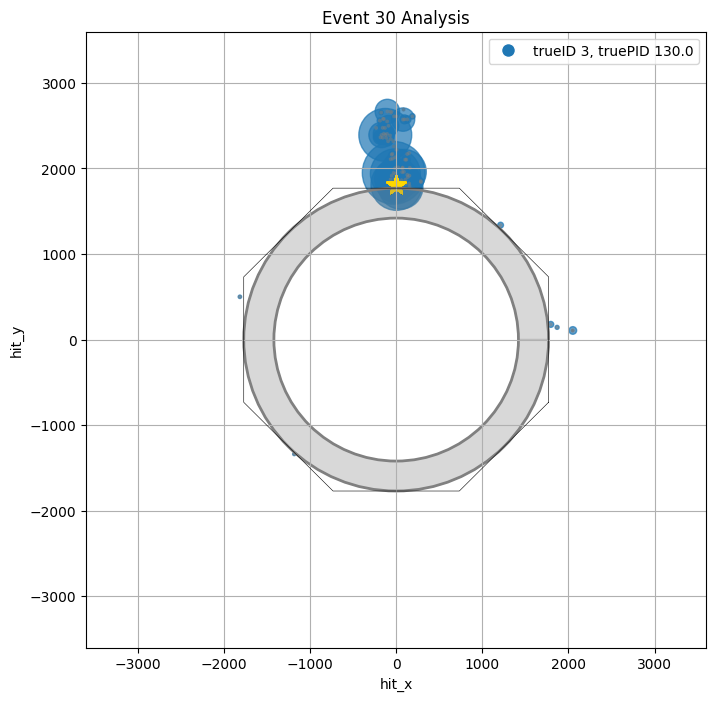

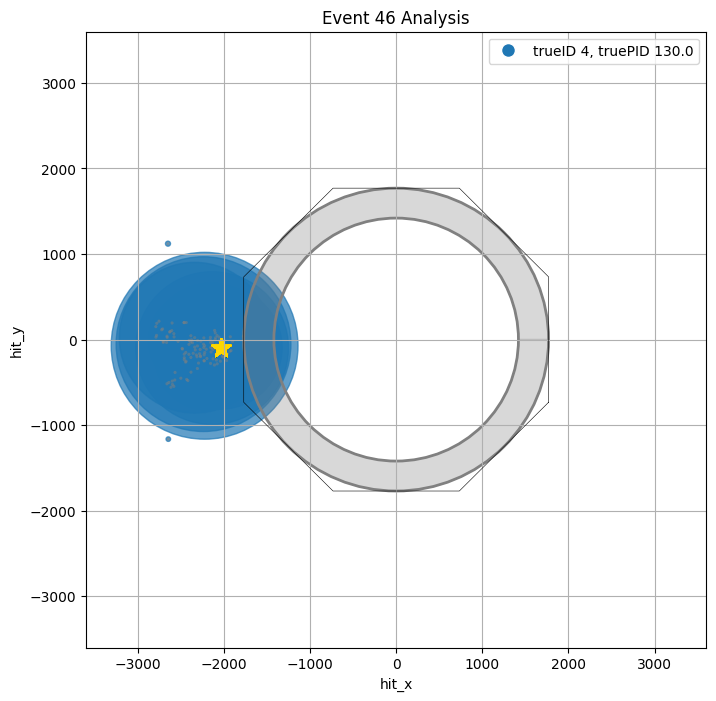

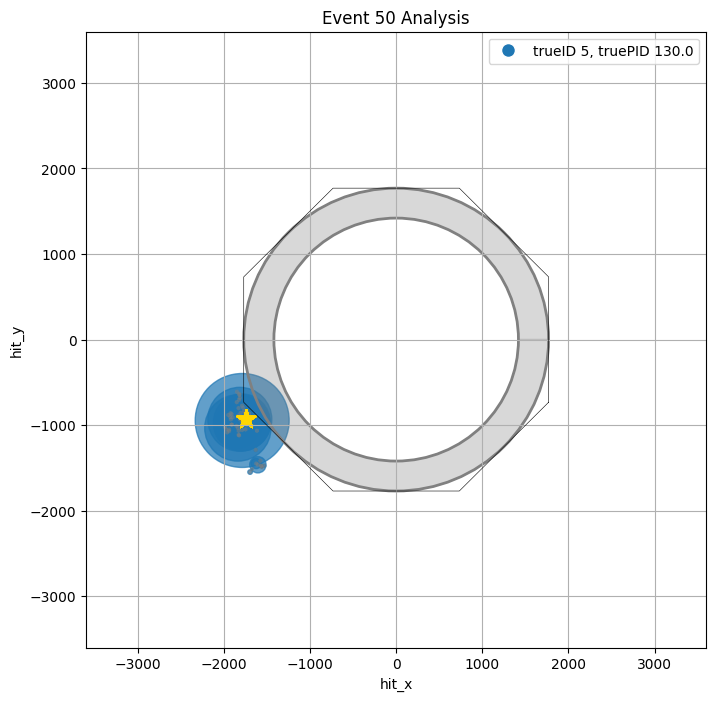

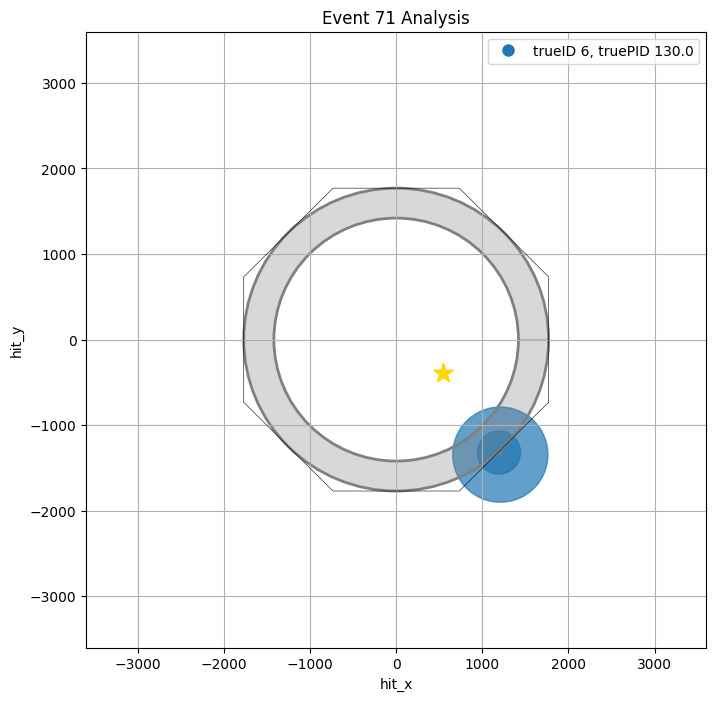

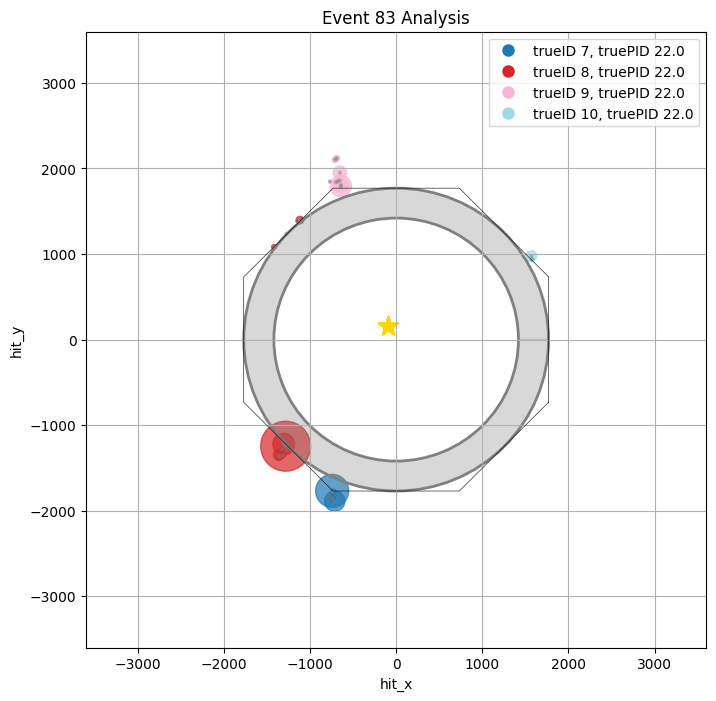

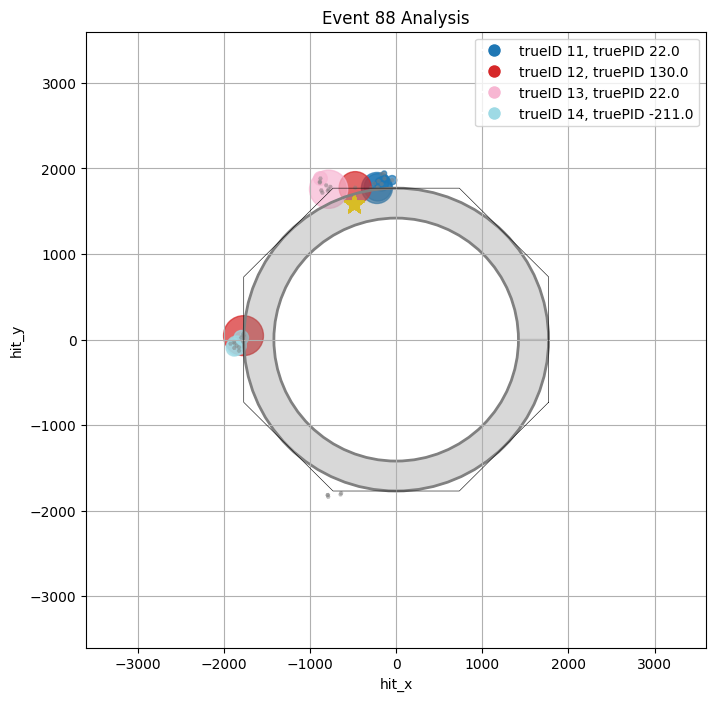

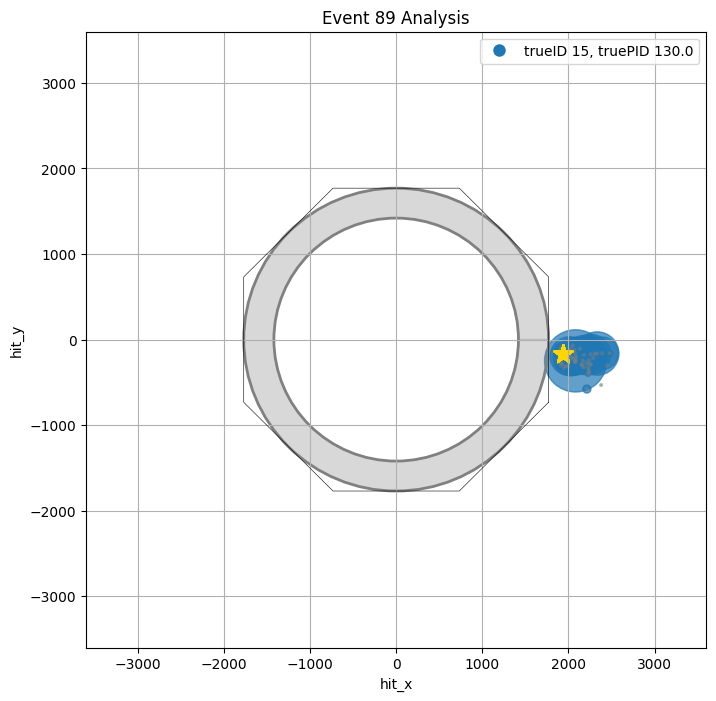

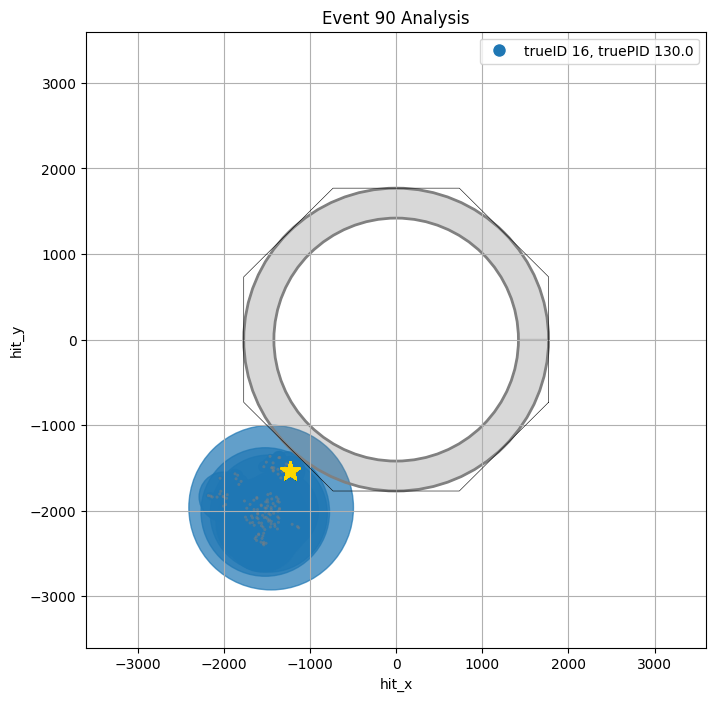

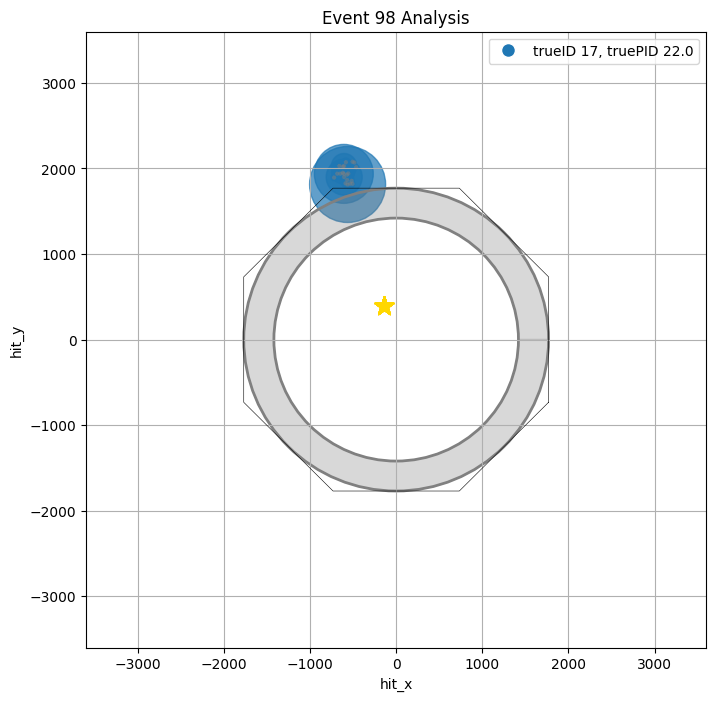

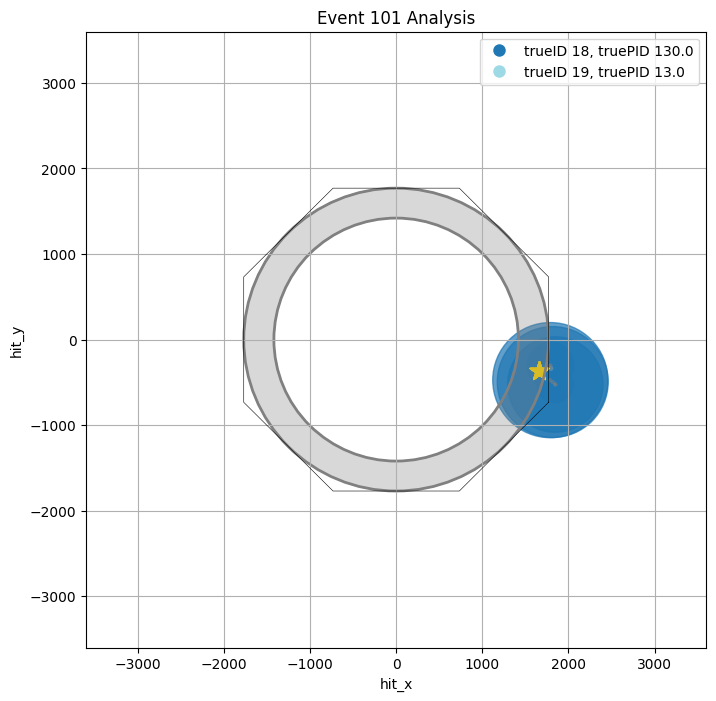

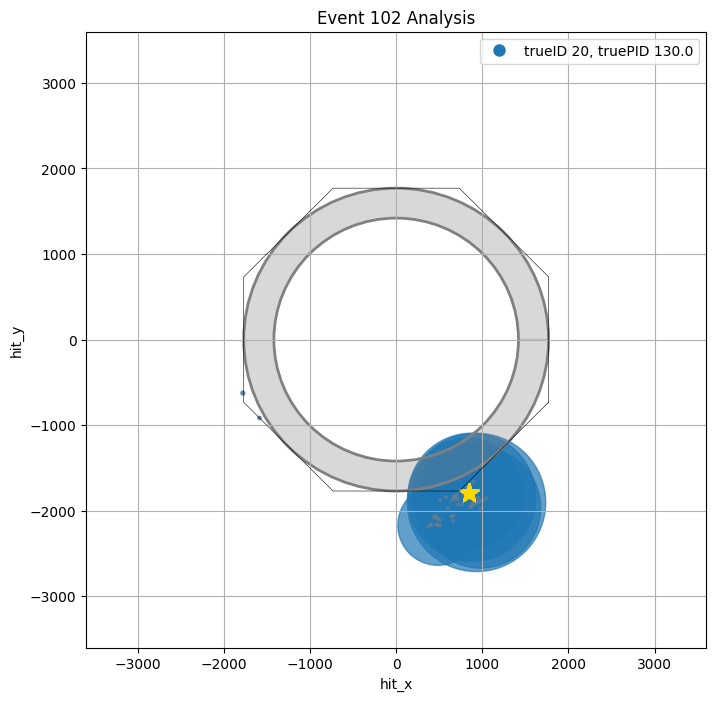

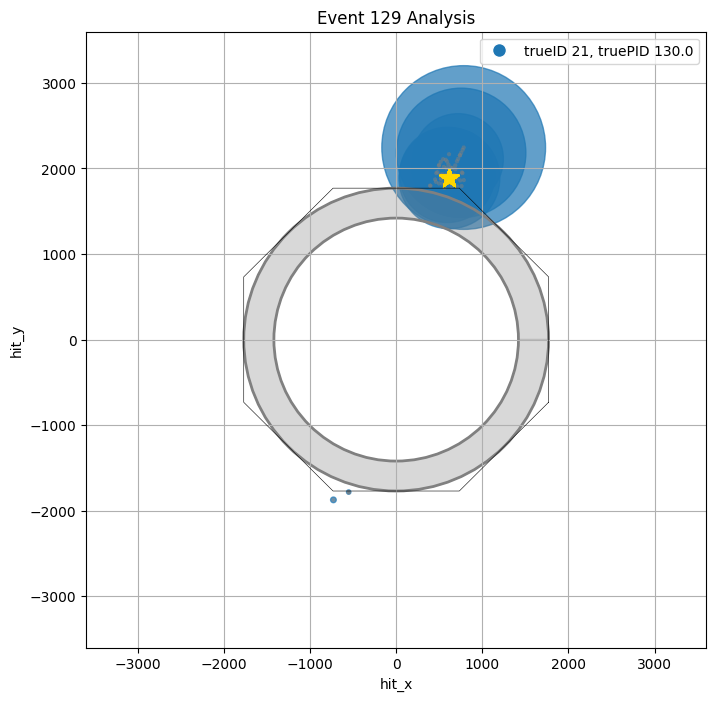

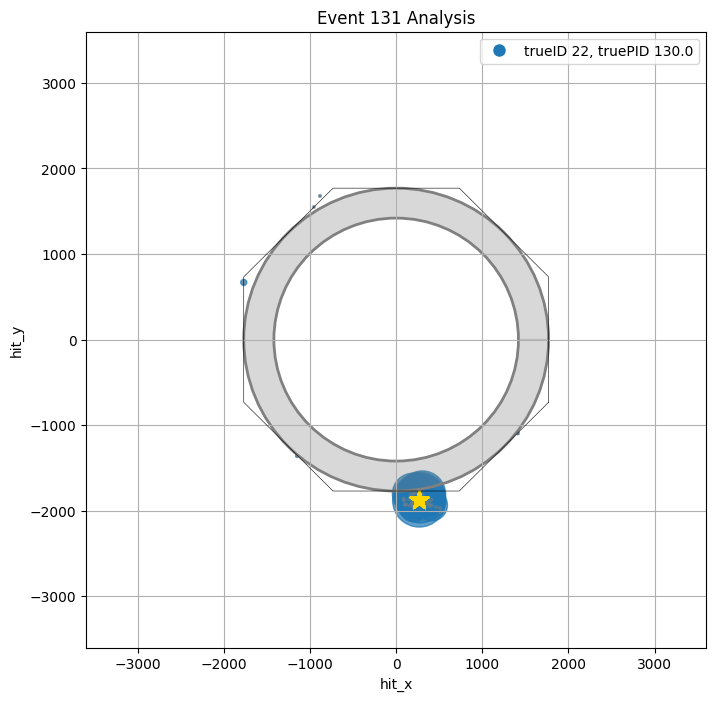

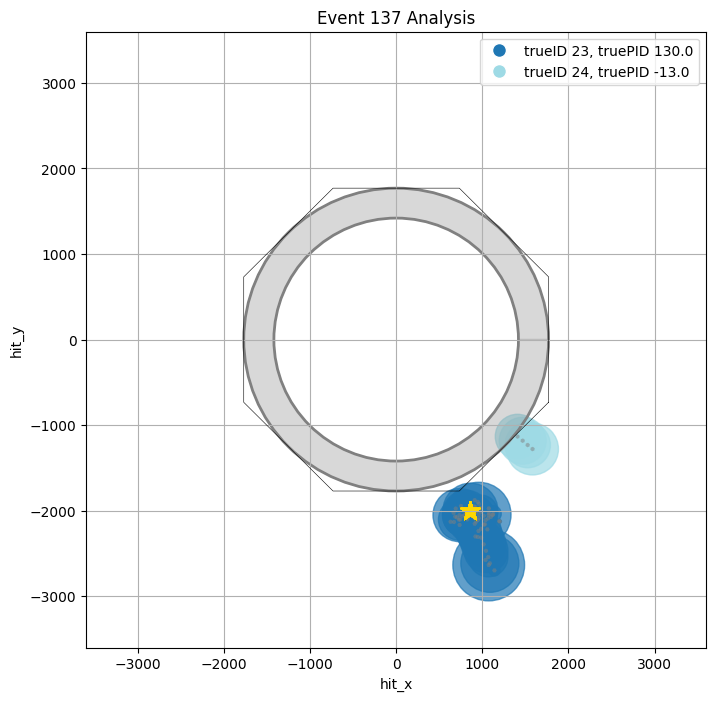

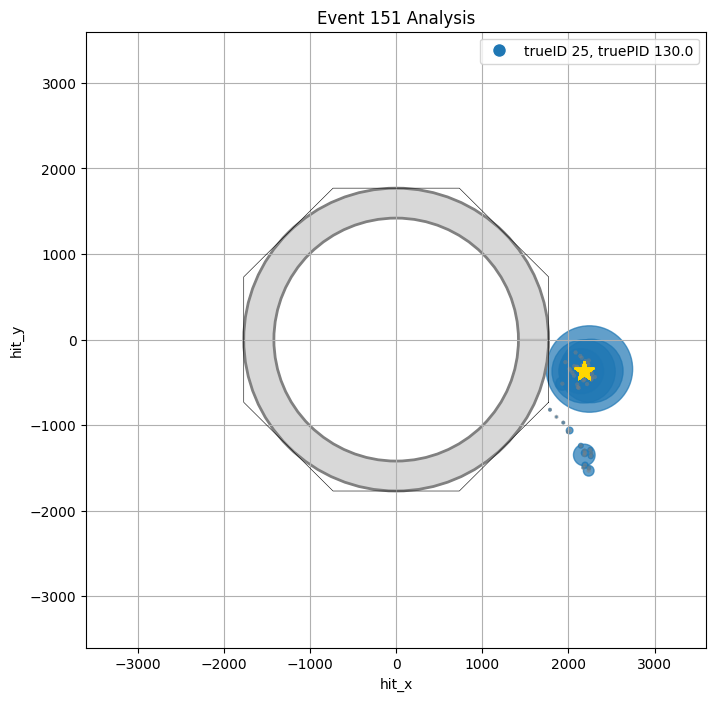

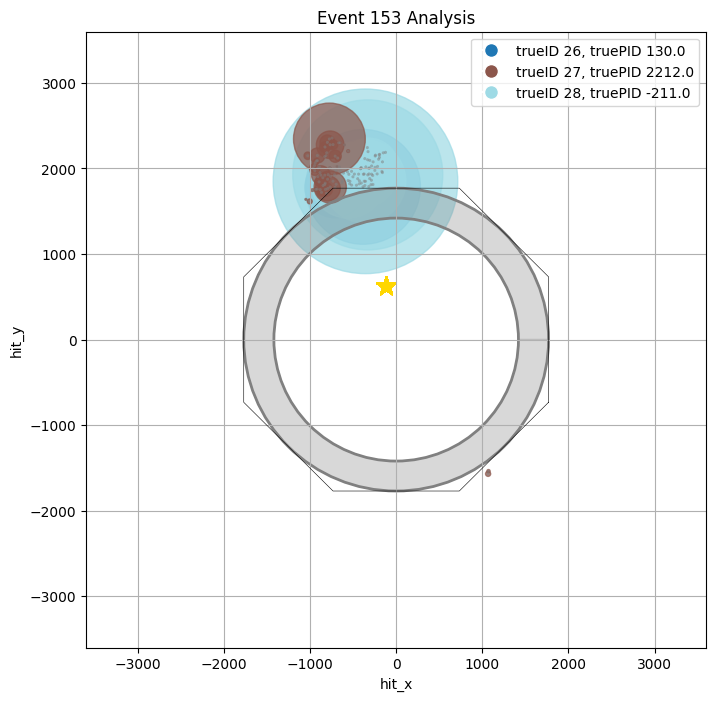

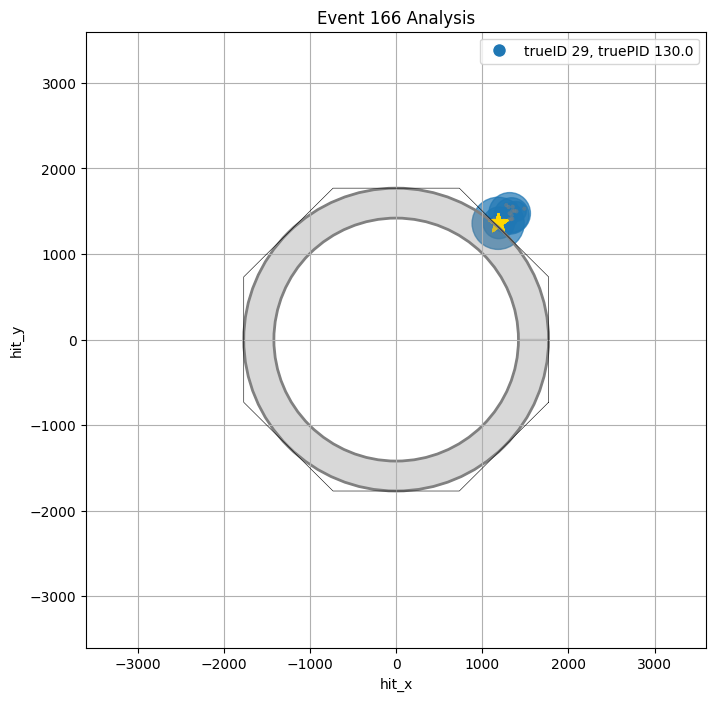

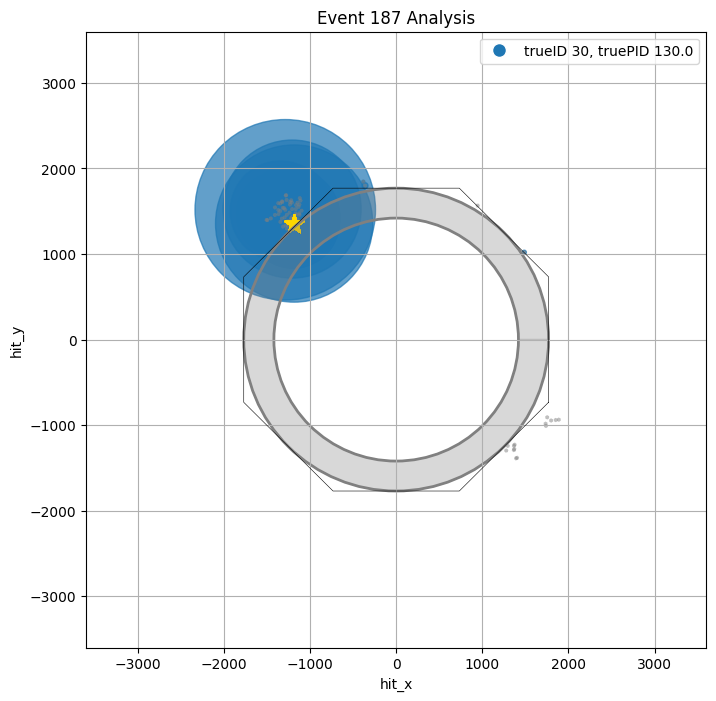

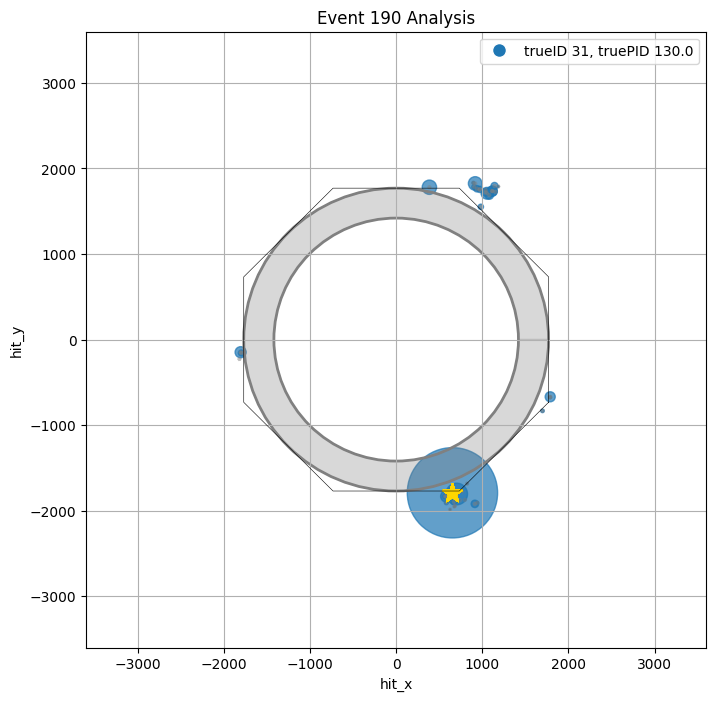

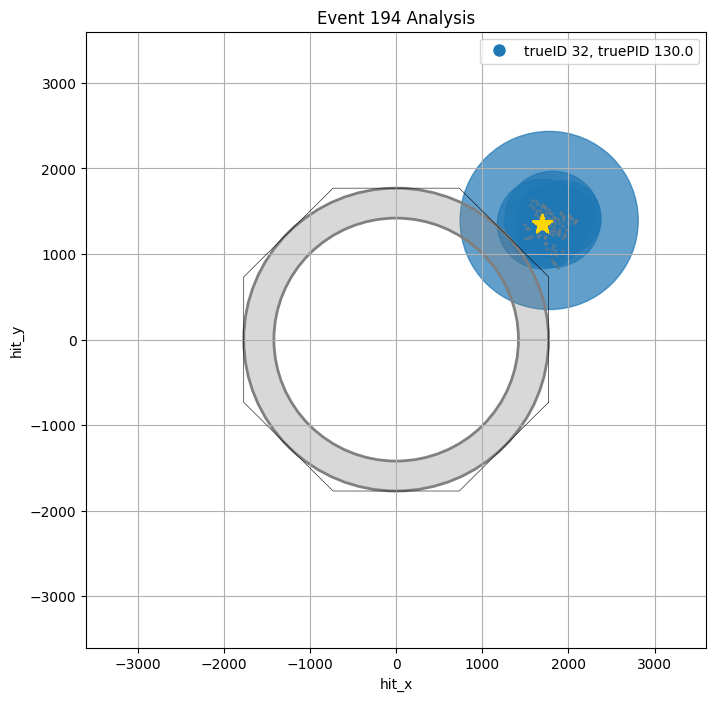

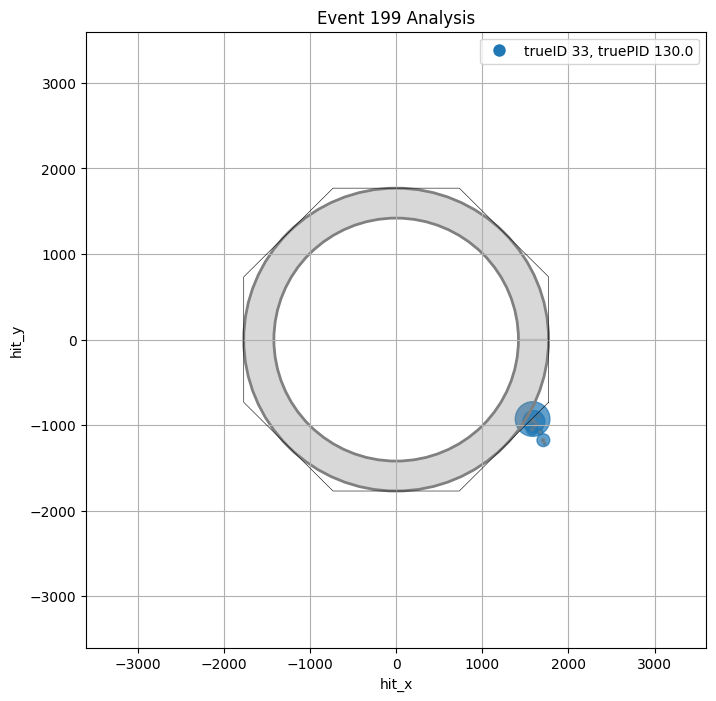

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

import numpy as np
import matplotlib.cm as cm
data = df
# Group the data by event_idx for analysis
events = data.groupby("event_idx")

# Create a colormap for trueID values

# Loop through each event and create plots
for event_idx, group in events:
    
    unique_trueIDs = []
    labels = []
    for trueID,truePID in zip(group["trueID"],group["truePID"]):
        if(trueID in unique_trueIDs):
#             trueID_index += 1
            continue
        else:
#             length = group["truePID"].keys()
#             print(f"len {length}, idx: {trueID_index}")
#             truePID = group["truePID"][trueID_index]
            unique_trueIDs.append(trueID)
            labels.append(f"trueID {trueID}, truePID {truePID}")
#             trueID_index += 1
    unique_trueIDs = np.array(unique_trueIDs)
    colors = cm.tab20(np.linspace(0, 1, len(unique_trueIDs)))
    color_map = dict(zip(unique_trueIDs, colors))
    # Prepare data for plotting
    x = group["hit_x"]
    y = group["hit_y"]
    sizes = group["Charge1"] + group["Charge2"]
    trueIDs = group["trueID"]
    phi = np.arctan2(y, x)

    # Assign colors based on trueID
    point_colors = [color_map[tid] for tid in trueIDs]

    # Create the plot
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, s=sizes * 20, c=point_colors, alpha=0.7, label="Data points")
    plt.quiver(x, y, np.cos(phi), np.sin(phi), angles="xy", scale_units="xy", scale=1, color="gray", alpha=0.5)
    endpoints_x = np.array(group["KMU_endpoint_x"])
    endpoints_y = np.array(group["KMU_endpoint_y"])
    plt.scatter(endpoints_x, endpoints_y, color="gold", marker="*", s=200, label="KMU Endpoint")

    # Add legend for trueID colors
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[tid], markersize=10) 
               for tid in unique_trueIDs]
#     labels = [f"trueID {tid[0]}, truePID {tid[1]}" for tid in unique_trueIDs]
    plt.legend(handles, labels, loc="upper right")

    # Add labels and title
    plt.xlabel("hit_x")
    plt.ylabel("hit_y")
    plt.title(f"Event {event_idx} Analysis")
    plt.grid(True)
    
    R = (1420 + 350)
    R_min = (1420)
    color = "black"
    outer_radius = R / np.cos(np.pi/8)
    angles = np.linspace(-np.pi/8, 2*np.pi-np.pi/8, 9)[:-1] 
    hex_x = outer_radius * np.cos(angles)
    hex_y = outer_radius * np.sin(angles)
    plt.plot(np.append(hex_x,hex_x[0]), np.append(hex_y, hex_y[0]), color=color, linewidth=0.4)
    
    #circle drawing
    theta = np.linspace(0, 2*np.pi, 100)

    # Create points for the outer and inner circles
    x_outer = R * np.cos(theta)
    y_outer = R * np.sin(theta)
    x_inner = R_min * np.cos(theta)
    y_inner = R_min * np.sin(theta)

    # Combine the points to create a closed path
    x = np.concatenate([x_outer, x_inner[::-1], [x_outer[0]]])
    y = np.concatenate([y_outer, y_inner[::-1], [y_outer[0]]])

    # Fill the region between circles
    plt.fill(x, y, alpha=0.3, color='gray', label='Solenoid')

    circle_out = Circle((0, 0), R, color="gray", fill=False, linewidth=2)
    circle_in = Circle((0, 0), R_min, color="gray", fill=False, linewidth=2)
    plt.gca().add_patch(circle_out)
    plt.gca().add_patch(circle_in)

    plt.xlim(-3600,3600)
    plt.ylim(-3600,3600)
    plt.show()
#     if(event_idx > 200):
#         break


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.colors import LogNorm
import numpy as np

# Read the CSV file
curr_df = df_old
import os

# Get unique event indices
unique_events = curr_df['event_idx'].unique()

# Create a directory to save plots if it doesn't exist
# os.makedirs('event_plots', exist_ok=True)

# Create a plot for each unique event
for event in unique_events:
    # Filter data for the current event
    event_df = curr_df[curr_df['event_idx'] == event]
    
    # Create figure for this event
    plt.figure(figsize=(10, 8))
    
    # Calculate total time
#     total_time = event_df['Charge1'] + event_df['Charge2']
    total_time = np.maximum(event_df['Time1'], event_df['Time2'])
    
    # Create scatter plot
    scatter = plt.scatter(event_df['strip_x'] * 10, event_df['strip_y'] * 10, 
                          c=total_time, 
                          cmap='viridis',  
#                           norm=LogNorm(),
                          alpha=0.7,s = np.ones(len(total_time)) * 8)
    
    # Add colorbar
    plt.colorbar(scatter, label='Time1')
    
    # Set labels and title
    plt.xlabel('Strip X Coordinate')
    plt.ylabel('Strip Y Coordinate')
    plt.title(f'Event {event}: Strip Coordinates Colored by Time1')
    plt.grid(True)
    
    R = (1420 + 350)
    R_min = (1420)
    color = "black"
    outer_radius = R / np.cos(np.pi/8)
    angles = np.linspace(-np.pi/8, 2*np.pi-np.pi/8, 9)[:-1] 
    hex_x = outer_radius * np.cos(angles)
    hex_y = outer_radius * np.sin(angles)
    plt.plot(np.append(hex_x,hex_x[0]), np.append(hex_y, hex_y[0]), color=color, linewidth=0.4)
    
    #circle drawing
    theta = np.linspace(0, 2*np.pi, 100)

    # Create points for the outer and inner circles
    x_outer = R * np.cos(theta)
    y_outer = R * np.sin(theta)
    x_inner = R_min * np.cos(theta)
    y_inner = R_min * np.sin(theta)

    # Combine the points to create a closed path
    x = np.concatenate([x_outer, x_inner[::-1], [x_outer[0]]])
    y = np.concatenate([y_outer, y_inner[::-1], [y_outer[0]]])

    # Fill the region between circles
    plt.fill(x, y, alpha=0.3, color='gray', label='Solenoid')

    circle_out = Circle((0, 0), R, color="gray", fill=False, linewidth=2)
    circle_in = Circle((0, 0), R_min, color="gray", fill=False, linewidth=2)
    plt.gca().add_patch(circle_out)
    plt.gca().add_patch(circle_in)
#     plt.xlim(-3600,3600)
#     plt.ylim(-3600,3600)
    plt.xlim(-2500,2500)
    plt.ylim(-2500,2500)
    plt.show()
    
    # Save the plot
#     plt.savefig(f'event_plots/event_{event}_scatter.png')
    
    # Close the plot to free up memory
#     plt.close()

print(f"Created {len(unique_events)} scatter plots in the 'event_plots' directory.")